In [18]:
# Importing Necesaary Library
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Loading Data
data = scipy.io.loadmat("./infmsk_hw1.mat")
infmask = data['infmsk']
infection_masks = []
for i in range(infmask.shape[2]):
  infection_masks.append(infmask[:,:,i])
infection_masks = np.array(infection_masks)
print(infection_masks.shape)
# print(infection_masks[2])
N = infection_masks.shape[0]

(3554, 512, 512)


In [20]:
class categorize:
    def __init__(self, infection_masks):
      self.count_background = []
      self.count_infection = []
      self.count_healthy = []
      self.infection_rate = []
      self.distribution = {'Normal':0, 'Mild':0, 'Severe':0}
      self.infection_masks = infection_masks
        
    def calc_counts(self):
      for sample in self.infection_masks:
        self.count_background.append(np.count_nonzero(sample == 0))
        self.count_infection.append(np.count_nonzero(sample == 1))
        self.count_healthy.append(np.count_nonzero(sample == 2))
    
    def calc_infection_rate(self):
      N = len(self.count_infection)
      for i in range(N):
        x = (self.count_infection[i]/(self.count_infection[i]+self.count_healthy[i])) * 100
        self.infection_rate.append(x)
      self.infection_rate = np.array(self.infection_rate)
        
    def calc_dist(self):
      self.distribution['Normal'] = np.count_nonzero(self.infection_rate == 0)
      self.distribution['Severe'] = np.count_nonzero(self.infection_rate > 40)
      self.distribution['Mild'] = N - self.distribution['Severe'] - self.distribution['Normal']
    
    def print_samples(self):
      N = len(self.count_infection)
    
      for i in range(N):
        x = self.infection_rate[i]
        if(x == 0):
          sample_healthy = i
        if(x > 0 and x <= 40):
          sample_mild = i
        if(x > 40):
          sample_severe = i
    
      print("Healthy")
      print("Infection Rate = ", "{:.2f}".format(infection_rate[sample_healthy]), "%")
      print("Infection Mask:")
      plt.imshow(infection_masks[sample_healthy])
      plt.show()
      print()

      print("Mild")
      print("Infection Rate = ", "{:.2f}".format(infection_rate[sample_mild]), "%")
      print("Infection Mask:")
      plt.imshow(infection_masks[sample_mild])
      plt.show()
      print()

      print("Severe")
      print("Infection Rate = ", "{:.2f}".format(infection_rate[sample_severe]), "%")
      print("Infection Mask:")
      plt.imshow(infection_masks[sample_severe])
      plt.show()

In [21]:
obj = categorize(infection_masks)
obj.calc_counts()
obj.calc_infection_rate()
obj.calc_dist()

Print the obtained distribution

Class Distribution:
{'Normal': 1441, 'Mild': 1954, 'Severe': 159}


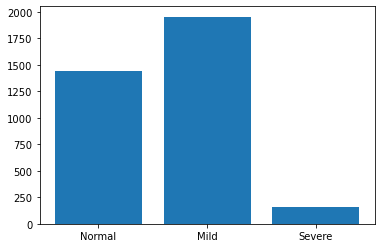

In [22]:
distribution = obj.distribution
print("Class Distribution:")
print(distribution)

names = list(distribution.keys())
values = list(distribution.values())
plt.bar(range(len(distribution)), values, tick_label=names)
plt.show()

Print one sample from each class

Healthy
Infection Rate =  0.00 %
Infection Mask:


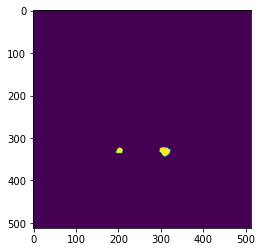


Mild
Infection Rate =  37.34 %
Infection Mask:


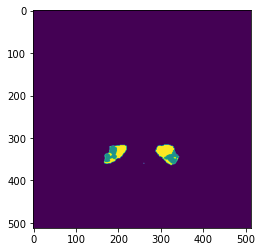


Severe
Infection Rate =  40.45 %
Infection Mask:


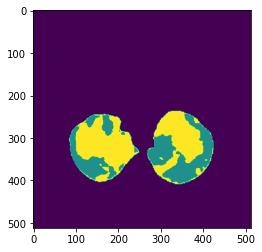

In [23]:
obj.print_samples()

**COMPLETED**